In [3]:
import random

class Sentiment:
    NEGATIVE = "NEGATIVE"
    NEUTRAL = "NEUTRAL"
    POSITIVE = "POSITIVE"

class Review:
    def __init__(self,text,score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()

    def get_sentiment(self):
        if self.score <= 2:
            return 'NEGATIVE'
        elif self.score == 3:
            return 'NEUTRAL'
        else:
            return 'POSITIVE'
class ReviewContainer:
    def __init__(self,reviews):
        self.reviews = reviews

    def get_text(self):
        return [x.text for x in self.reviews]

    def get_sentiment(self):    
        return [x.sentiment for x in self.reviews]
    
    def evelny_distribute(self):
        negative = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE,self.reviews))
        positive = list(filter(lambda x: x.sentiment == Sentiment.POSITIVE,self.reviews))[:len(negative)]
        self.reviews = negative + positive
        random.shuffle(self.reviews)

In [4]:
import json

file_path = './data/sentiment/books_small_10000.json'
reviews = []
with open(file_path) as f:
    for line in f:
        review  = json.loads(line)
        reviews.append(Review(review['reviewText'],review['overall']))

In [5]:
reviews[6].score

2.0

In [6]:
from sklearn.model_selection import train_test_split

training,testing = train_test_split(reviews,test_size=0.33,random_state=42)

train_container = ReviewContainer(training)
test_container = ReviewContainer(testing)

In [7]:
train_container.evelny_distribute()
train_x = train_container.get_text()
train_y = train_container.get_sentiment()

test_container.evelny_distribute()
test_x = test_container.get_text()
test_y = test_container.get_sentiment()

In [8]:
train_y.count(Sentiment.NEGATIVE)

436

In [9]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x)
test_x_vectors = vectorizer.transform(test_x)

In [10]:
print(train_x_vectors[0])
print(test_x_vectors[0])

  (0, 4277)	0.08156963149689153
  (0, 6399)	0.15950254218537435
  (0, 3076)	0.22359463766091803
  (0, 2781)	0.1759045283943843
  (0, 2229)	0.17021509189982464
  (0, 7813)	0.3455339067840174
  (0, 5260)	0.13284532999488358
  (0, 3177)	0.09682972517359191
  (0, 7176)	0.35804566216647465
  (0, 423)	0.07090991196751698
  (0, 1983)	0.28031553807255305
  (0, 8079)	0.16416012228235113
  (0, 991)	0.0823852158006002
  (0, 4212)	0.1607349089861157
  (0, 3374)	0.1540846337385369
  (0, 5408)	0.20720040553607527
  (0, 1790)	0.16199497172828412
  (0, 1168)	0.10241348265539653
  (0, 660)	0.15156013646110764
  (0, 7976)	0.15033654473413463
  (0, 1181)	0.1468284988972087
  (0, 7001)	0.3969107242134355
  (0, 449)	0.19520787071972256
  (0, 4686)	0.22755419518109515
  (0, 6411)	0.14914442116231547
  (0, 8255)	0.19808966733809502
  (0, 8004)	0.41364970771359877
  (0, 7982)	0.340444378174127
  (0, 7976)	0.07833835670626374
  (0, 7280)	0.13364917447440278
  (0, 6293)	0.21022309441585604
  (0, 5478)	0.0850096

In [11]:
def predict_f1_score(model,i):
    print(test_x[i])
    print('Truth: ',test_y[i])
    if model == gnb_model:
        print('Predicted: ',model.predict(test_x_vectors[i].toarray()))
        print(f1_score(test_y,model.predict(test_x_vectors.toarray()),average=None,labels=[Sentiment.POSITIVE,Sentiment.NEGATIVE,Sentiment.NEUTRAL]))

    else:
        print('Predicted: ',model.predict(test_x_vectors[i]))
        print(f1_score(test_y,model.predict(test_x_vectors),average=None,labels=[Sentiment.POSITIVE,Sentiment.NEGATIVE,Sentiment.NEUTRAL]))

Linear SVM

In [12]:
print(len(test_x))
print(len(test_y))

416
416


In [13]:
from sklearn.svm import SVC
clf_svm = SVC(kernel='linear')
svm_model = clf_svm.fit(train_x_vectors,train_y)
svm_model.score(test_x_vectors,test_y)

0.8076923076923077

In [31]:
predict_f1_score(svm_model,100)

I really enjoyed this book. I couldn't put this book down until I finished it. The characters were good and the story line volume good.
Truth:  NEGATIVE
Predicted:  ['POSITIVE']
[0.80582524 0.80952381 0.        ]


d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()
dt_model = clf_dt.fit(train_x_vectors,train_y)

In [32]:
predict_f1_score(dt_model,100)

I really enjoyed this book. I couldn't put this book down until I finished it. The characters were good and the story line volume good.
Truth:  NEGATIVE
Predicted:  ['POSITIVE']
[0.64039409 0.657277   0.        ]


d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


Gaussin Naive bayes

In [17]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB()
gnb_model = clf_gnb.fit(train_x_vectors.toarray(),train_y)

In [33]:
predict_f1_score(gnb_model,100)

I really enjoyed this book. I couldn't put this book down until I finished it. The characters were good and the story line volume good.
Truth:  NEGATIVE
Predicted:  ['NEGATIVE']
[0.65693431 0.66508314 0.        ]


d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
lr_model = clf_lr.fit(train_x_vectors,train_y)

In [34]:
predict_f1_score(lr_model,100)

I really enjoyed this book. I couldn't put this book down until I finished it. The characters were good and the story line volume good.
Truth:  NEGATIVE
Predicted:  ['POSITIVE']
[0.80291971 0.80760095 0.        ]


d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


checking scores of every model

In [21]:
print(clf_svm.score(test_x_vectors,test_y))
print(clf_lr.score(test_x_vectors,test_y))
print(clf_dt.score(test_x_vectors,test_y))
print(clf_gnb.score(test_x_vectors.toarray(),test_y))


0.8076923076923077
0.8052884615384616
0.6490384615384616
0.6610576923076923


check f1 scores

In [22]:
from sklearn.metrics import f1_score

f1_svm = f1_score(test_y,clf_svm.predict(test_x_vectors),average=None,labels=[Sentiment.POSITIVE,Sentiment.NEGATIVE,Sentiment.NEUTRAL])
f1_dt = f1_score(test_y,clf_dt.predict(test_x_vectors),average=None,labels=[Sentiment.POSITIVE,Sentiment.NEGATIVE,Sentiment.NEUTRAL])
f1_gnb = f1_score(test_y,clf_gnb.predict(test_x_vectors.toarray()),average=None,labels=[Sentiment.POSITIVE,Sentiment.NEGATIVE,Sentiment.NEUTRAL])
f1_lr = f1_score(test_y,clf_lr.predict(test_x_vectors),average=None,labels=[Sentiment.POSITIVE,Sentiment.NEGATIVE,Sentiment.NEUTRAL])

d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this beh

performing well on positive but not on negative and neutral

In [23]:
print(f1_svm, f1_dt, f1_gnb,f1_lr)

[0.80582524 0.80952381 0.        ] [0.64039409 0.657277   0.        ] [0.65693431 0.66508314 0.        ] [0.80291971 0.80760095 0.        ]


it can be seen that SVM and Logitic Regression are performing better now

Tuining our model more!!

In [24]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear','poly','rbf','sigmoid'),'C':(2,3,5,7,11,13)}
svc = SVC()
clf = GridSearchCV(svc,parameters,cv=5)
clf.fit(train_x_vectors,train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': (2, 3, 5, 7, 11, 13),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')})

In [25]:
print(clf.score(test_x_vectors,test_y))

0.8173076923076923


save model

In [35]:
import pickle

with open('./models/Sentiment_Prediction.pkl','wb') as f:
    pickle.dump(clf,f)

with open('trained_vectorizer.pkl','wb') as f:
    pickle.dump(vectorizer,f)


In [40]:
import pickle

with open('./models/Sentiment_Prediction.pkl','rb') as f:
    clf = pickle.load(f)

with open('trained_vectorizer.pkl','rb') as f:
    vec = pickle.load(f)

In [43]:
test_set = ['good product']
test_vec = vec.transform(test_set)
clf.predict(test_vec)

array(['POSITIVE'], dtype='<U8')

In [28]:
model.predict(test_x_vectors[99])

array(['POSITIVE'], dtype='<U8')

In [29]:
test_x[99]

"This hole series was amazing I'm glad I read it the story was so catching I just couldn't put it down"

Text(33.0, 0.5, 'Truth')

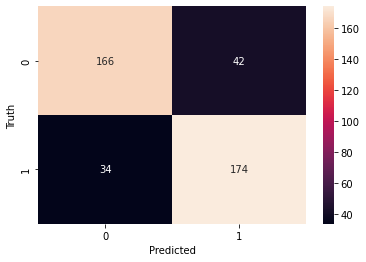

In [30]:
import seaborn as sb
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

predicted = model.predict(test_x_vectors)

cm = confusion_matrix(test_y,predicted)
sb.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')